In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.sps as sps
import lbg_forecast.popmodel as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.distributions as dstr
import lbg_forecast.hyperparams as hyp
import lbg_forecast.tools as tools

In [3]:
#uniform distribution for all
hyper_parameter_bounds = hyp.define_hyperparameter_bounds(
    zred = np.array([0, 0, 7]),
    logtage = np.array([0, -3, 1]),
    logzsol = np.array([0, -2.5, 0.5]),
    dust1 = np.array([0, 0, 2]),
    dust2 = np.array([0, 0, 2]),
    igm_factor = np.array([2, 0, 2]),
    gas_logu = np.array([0, -4, -1]),
    gas_logz = np.array([0, -2.5, 0.5]),
    fagn = np.array([0, 0, 10]),
    imf1 = np.array([0, 1.3, 1.3]), 
    imf2 = np.array([0, 2.4, 2.4]), 
    imf3 = np.array([0, 1.0, 3.4]), 
    logtau = np.array([0, -4, 1]),
    loga = np.array([0, -3, 3]),
    logb = np.array([0, -3, 3]),
    logmass = np.array([0, 7, 13])
)

hyperparameters = hyp.sample_hyper_parameters(hyper_parameter_bounds)
#hyp.plot_hyperparameters(10000, hyper_parameter_bounds, rows=7, nbins=20)


In [4]:
spsparams = tools.draw_sps_parameters(10000, hyperparameters)

array([[1.3, 2.4, 1.2],
       [1.3, 2.4, 1.2],
       [1.3, 2.4, 1.2],
       ...,
       [1.3, 2.4, 3.2],
       [1.3, 2.4, 3.2],
       [1.3, 2.4, 3.2]])

Galaxy Age (Gyr): 0.9302793334675172
Observed Metallicity (Absolute Metallicity): 0.0001350459239542934


(array([4.49043428e-05, 4.49043428e-05, 4.49043428e-05, ...,
        1.35045924e-04, 1.35045924e-04, 1.35045924e-04]),
 array([7.70741004e-039, 7.77511111e-039, 7.84340686e-039, ...,
        1.04798348e-302, 7.15936885e-303, 4.89097044e-303]))

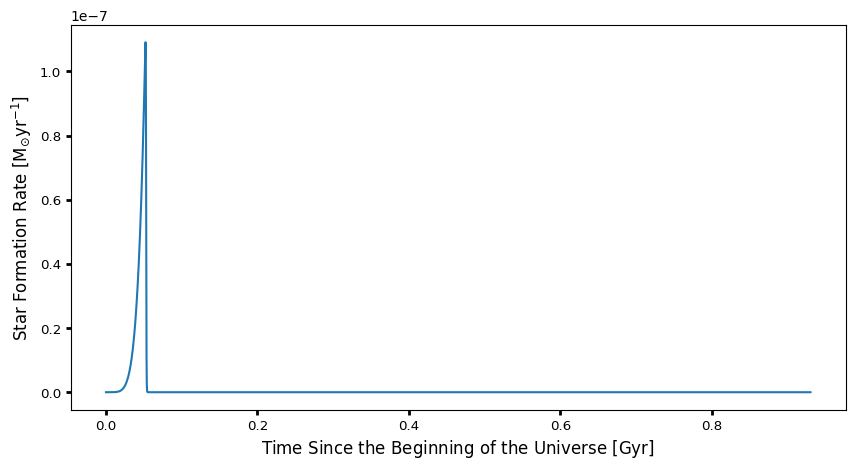

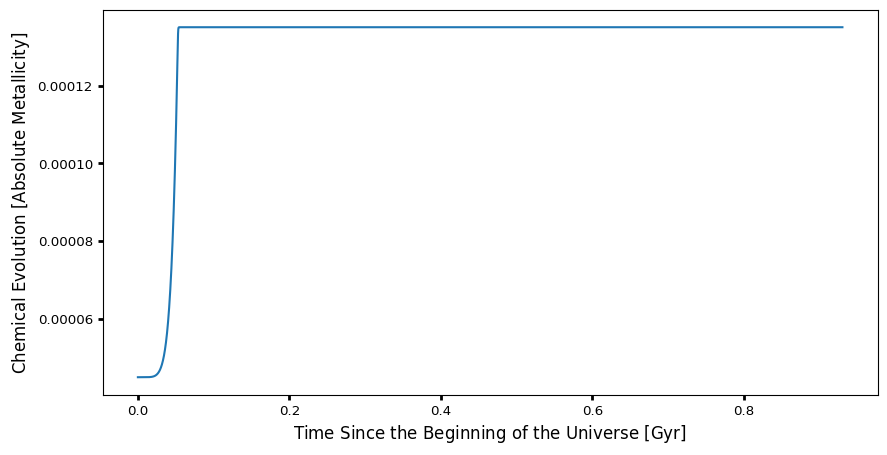

In [12]:
tools.sfh_zhis_diag(spsparams, 17)

In [6]:
#data = tools.simulate_photometry(1, hyperparameters, filters='all')

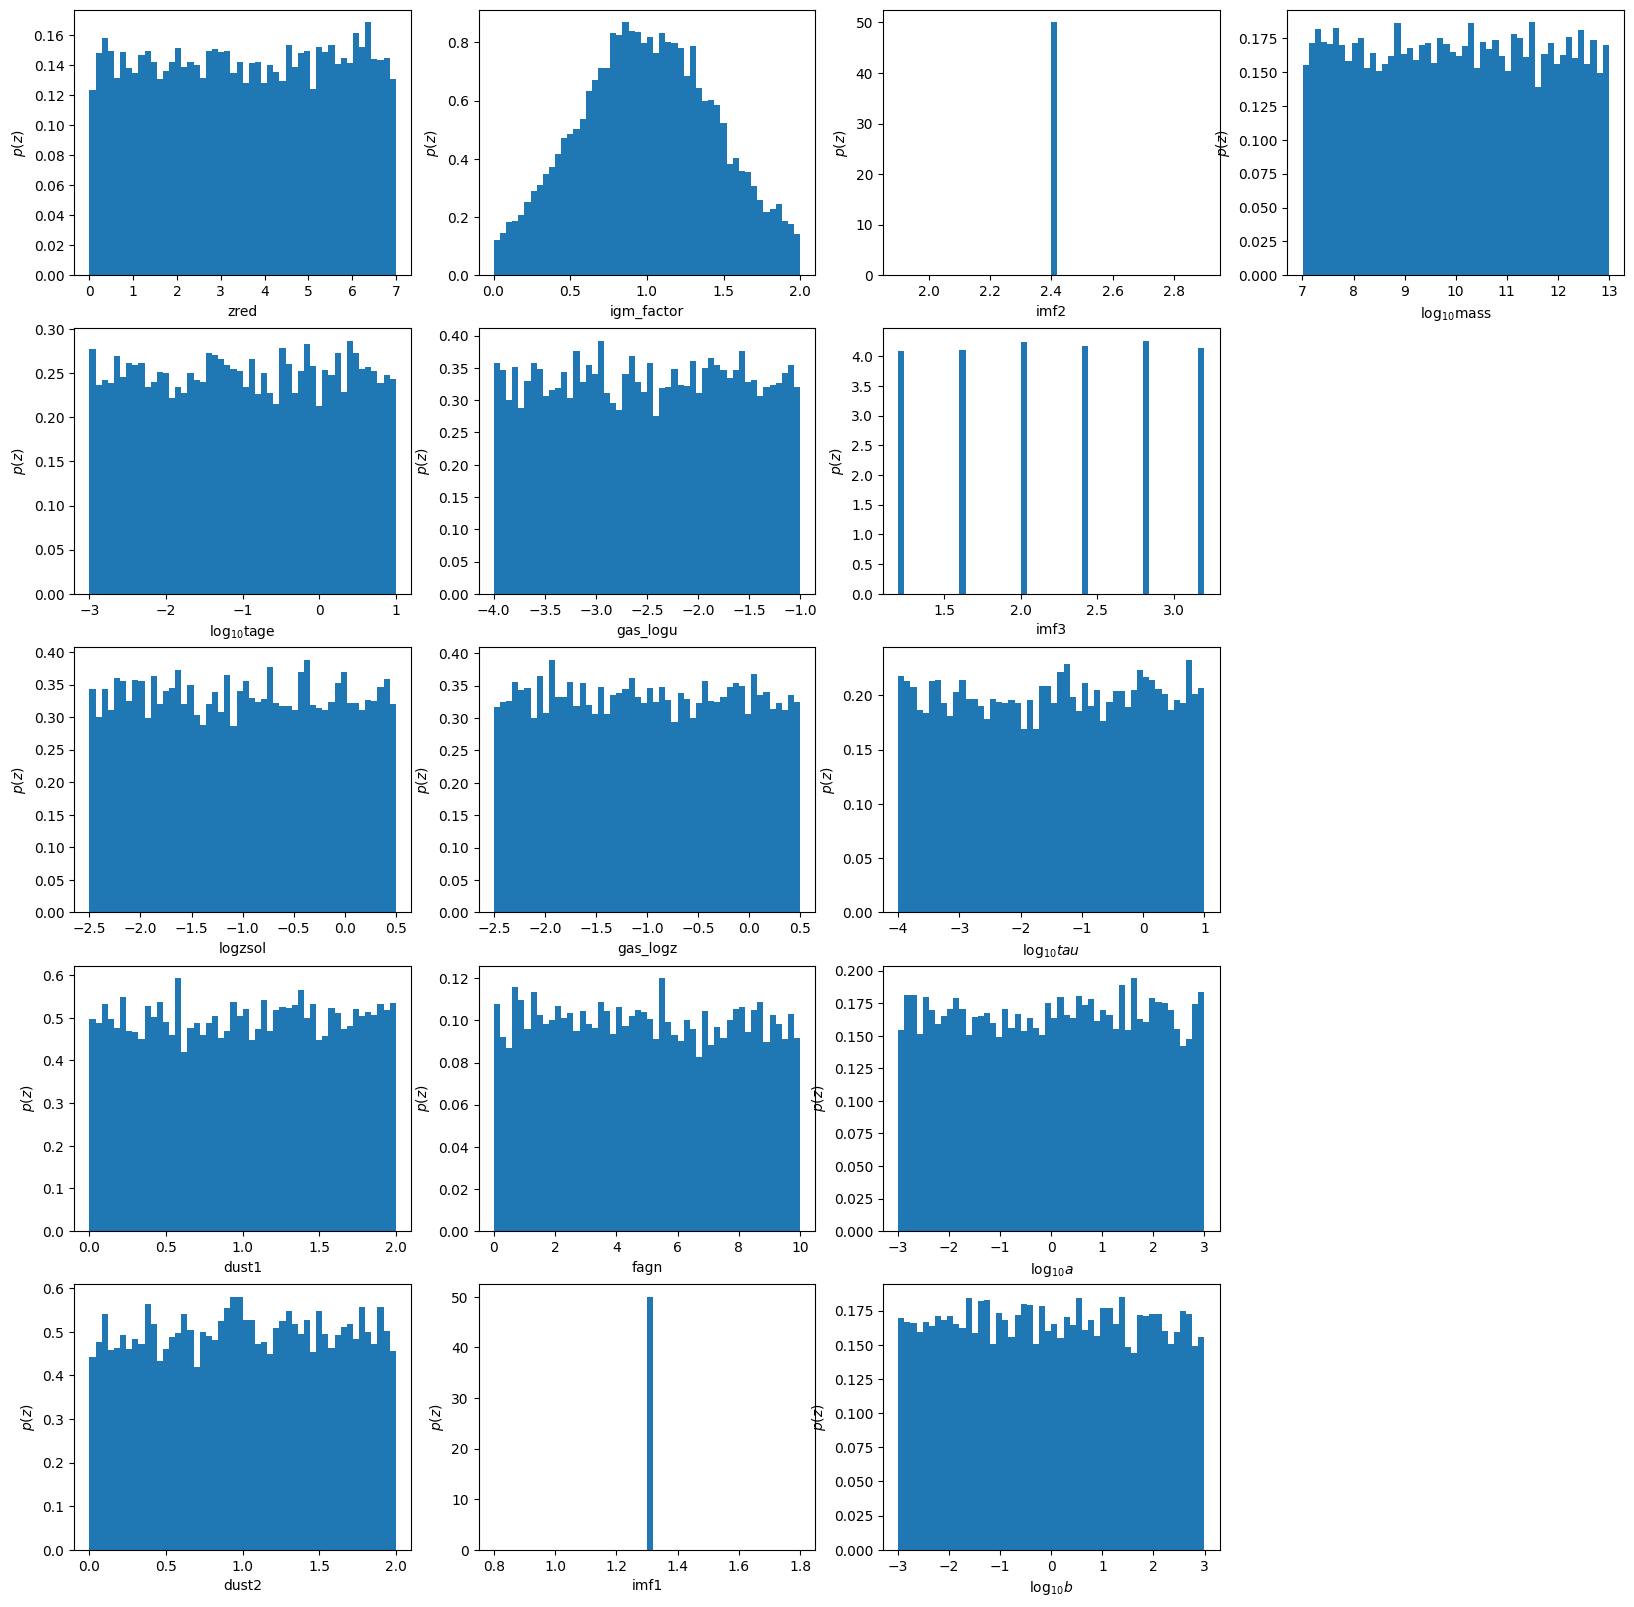

In [7]:
tools.plot_galaxy_population(spsparams, nbins=50)